In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import os
import re
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from IPython.display import IFrame
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In this notebook, we'll delve into the **crime data** recorded between **July and September of 2023**. This specific time frame will act as a **reference point** for assessing **seasonal patterns**, which we can then compare with the corresponding months in **2024**. 📊🔍

In [2]:
path_to_data = './crime'
cd = os.path.dirname(os.path.abspath(path_to_data))
i = 0
columns = range(1, 100)
dfList = []

for root, dirs, files in os.walk(cd):
    for fname in files:
        if re.match("^.*.csv$", fname):
            frame = pd.read_csv(os.path.join(root, fname))
            frame['key'] = "file{}".format(i)
            dfList.append(frame)
            i += 1

dataset = pd.concat(dfList)


In [3]:
dataset.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,key
0,fdbfe8687cff5c8bb5b608d2c55c1c0f89ab4bffc0a930...,2023-07,West Midlands Police,West Midlands Police,-1.848972,52.588428,On or near Woodside,E01009417,Birmingham 001A,Burglary,Status update unavailable,NaN,file0
1,529bf0133cd02de6bb141ed626da524290228839e49dd4...,2023-07,West Midlands Police,West Midlands Police,-1.847123,52.593864,On or near Bramble Way,E01009417,Birmingham 001A,Other theft,Status update unavailable,NaN,file0
2,d0b1a135417bdcc795357bc98aaa6c671e0e4ae733645d...,2023-07,West Midlands Police,West Midlands Police,-1.847123,52.593864,On or near Bramble Way,E01009417,Birmingham 001A,Violence and sexual offences,Unable to prosecute suspect,NaN,file0
3,1be486ee49b3c870818ebd05abdce78534115313c022eb...,2023-07,West Midlands Police,West Midlands Police,-1.840582,52.598279,On or near Badgers Bank Road,E01009418,Birmingham 001B,Criminal damage and arson,Status update unavailable,NaN,file0
4,c7da1ec1b34c2728c2efd835dcb21b013aa4d43cd2492c...,2023-07,West Midlands Police,West Midlands Police,-1.839093,52.597818,On or near Byron Court,E01009418,Birmingham 001B,Other theft,Status update unavailable,NaN,file0


In [4]:
dataset.shape

(91230, 13)

In [5]:
#Export the dataset to a csv file

name_number = 'JaimePantoa-2436040.csv'
dataset.to_csv(name_number, index=False)

In [6]:
data = pd.read_csv(name_number)

In [7]:
data['Crime type'].value_counts()

Violence and sexual offences    36132
Vehicle crime                    8193
Anti-social behaviour            7906
Criminal damage and arson        6943
Shoplifting                      6351
Other theft                      6199
Public order                     5957
Burglary                         4937
Robbery                          2075
Drugs                            1933
Possession of weapons            1636
Other crime                      1443
Theft from the person             847
Bicycle theft                     678
Name: Crime type, dtype: int64

**Q1:** Using a similar approach display the number of crimes in each month. You can use the 'Month' column to do that.

In [8]:
data['Month'].value_counts()

2023-07    31601
2023-08    29958
2023-09    29671
Name: Month, dtype: int64

During this workshop, our focus will be on **analyzing crime data specifically in Birmingham**. To achieve this, we applied a filter based on the **LSOA name** columns.


In [9]:
# We split the LSOA name into 
data['town'] = data['LSOA name'].str.split(' ').str[0]

In [10]:
data.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,key,town
0,fdbfe8687cff5c8bb5b608d2c55c1c0f89ab4bffc0a930...,2023-07,West Midlands Police,West Midlands Police,-1.848972,52.588428,On or near Woodside,E01009417,Birmingham 001A,Burglary,Status update unavailable,NaN,file0,Birmingham
1,529bf0133cd02de6bb141ed626da524290228839e49dd4...,2023-07,West Midlands Police,West Midlands Police,-1.847123,52.593864,On or near Bramble Way,E01009417,Birmingham 001A,Other theft,Status update unavailable,NaN,file0,Birmingham
2,d0b1a135417bdcc795357bc98aaa6c671e0e4ae733645d...,2023-07,West Midlands Police,West Midlands Police,-1.847123,52.593864,On or near Bramble Way,E01009417,Birmingham 001A,Violence and sexual offences,Unable to prosecute suspect,NaN,file0,Birmingham
3,1be486ee49b3c870818ebd05abdce78534115313c022eb...,2023-07,West Midlands Police,West Midlands Police,-1.840582,52.598279,On or near Badgers Bank Road,E01009418,Birmingham 001B,Criminal damage and arson,Status update unavailable,NaN,file0,Birmingham
4,c7da1ec1b34c2728c2efd835dcb21b013aa4d43cd2492c...,2023-07,West Midlands Police,West Midlands Police,-1.839093,52.597818,On or near Byron Court,E01009418,Birmingham 001B,Other theft,Status update unavailable,NaN,file0,Birmingham


In [11]:
# Now filter based the town column with the values of Birmingham

towns = ['Birmingham']
filtered_data = data[data.town.str.contains('|'.join(towns), na=False)]
filtered_data.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,key,town
0,fdbfe8687cff5c8bb5b608d2c55c1c0f89ab4bffc0a930...,2023-07,West Midlands Police,West Midlands Police,-1.848972,52.588428,On or near Woodside,E01009417,Birmingham 001A,Burglary,Status update unavailable,NaN,file0,Birmingham
1,529bf0133cd02de6bb141ed626da524290228839e49dd4...,2023-07,West Midlands Police,West Midlands Police,-1.847123,52.593864,On or near Bramble Way,E01009417,Birmingham 001A,Other theft,Status update unavailable,NaN,file0,Birmingham
2,d0b1a135417bdcc795357bc98aaa6c671e0e4ae733645d...,2023-07,West Midlands Police,West Midlands Police,-1.847123,52.593864,On or near Bramble Way,E01009417,Birmingham 001A,Violence and sexual offences,Unable to prosecute suspect,NaN,file0,Birmingham
3,1be486ee49b3c870818ebd05abdce78534115313c022eb...,2023-07,West Midlands Police,West Midlands Police,-1.840582,52.598279,On or near Badgers Bank Road,E01009418,Birmingham 001B,Criminal damage and arson,Status update unavailable,NaN,file0,Birmingham
4,c7da1ec1b34c2728c2efd835dcb21b013aa4d43cd2492c...,2023-07,West Midlands Police,West Midlands Police,-1.839093,52.597818,On or near Byron Court,E01009418,Birmingham 001B,Other theft,Status update unavailable,NaN,file0,Birmingham


**Q2:** Display crime types on Birmingham 

In [12]:
# This returns a list with the types of crimes in Birmingham .

crime_types_wolverhampton = filtered_data['Crime type'].unique()

print('The type of crimes in Wolverhamtopn are: ')
for crime in crime_types_wolverhampton:
    print(crime)


The type of crimes in Wolverhamtopn are: 
Burglary
Other theft
Violence and sexual offences
Criminal damage and arson
Public order
Vehicle crime
Anti-social behaviour
Shoplifting
Bicycle theft
Robbery
Drugs
Other crime
Possession of weapons
Theft from the person


In [13]:
# Sort the column 'Crime type' by number of crimes and display the top 15 e'
print('Incidents Occurrences by Type of Crime ')
filtered_data['Crime type'].value_counts().nlargest(15)

Incidents Occurrences by Type of Crime 


Violence and sexual offences    16198
Vehicle crime                    3373
Anti-social behaviour            3368
Criminal damage and arson        2818
Other theft                      2802
Public order                     2649
Shoplifting                      2327
Burglary                         2178
Robbery                          1129
Drugs                             955
Possession of weapons             763
Other crime                       525
Theft from the person             465
Bicycle theft                     303
Name: Crime type, dtype: int64

In [14]:
# Sort the column 'LSOA code' by number of crimes and display the top 10 'LSOA code'

filtered_data['LSOA code'].value_counts().nlargest(10)

E01033620    1349
E01033615     616
E01033561     477
E01033617     466
E01033557     278
E01009146     276
E01009200     276
E01009239     272
E01009219     249
E01033562     231
Name: LSOA code, dtype: int64

** Q3:** Provide a prime landmark of at least 2 LSOA code. If there is no recognisable prime landmar, provide name(s) of the nearby streets/roads sorroundung that area

> LSOA code E01033620. Birmingham Cathedral is located in this code near the Colmore Row.

> LSOA code E01033615. Bullring Shopping Centre near the St Martin's Queensway.

In [15]:
filtered_important_data = filtered_data[['LSOA code', 'Crime type']]
filtered_important_data.head()

,LSOA code,Crime type
0,E01009417,Burglary
1,E01009417,Other theft
2,E01009417,Violence and sexual offences
3,E01009418,Criminal damage and arson
4,E01009418,Other theft


In [16]:
filtered_important_data = filtered_data[['LSOA code', 'Crime type']]
# Convert 'Crime type' to dummy variables
filtered_important_data = pd.get_dummies(filtered_important_data, columns=['Crime type'])

# Aggregate data by 'LSOA code'
clustering_data = filtered_important_data.groupby(['LSOA code']).agg({
    'Crime type_Anti-social behaviour': 'sum',
    'Crime type_Bicycle theft': 'sum',
    'Crime type_Burglary': 'sum',
    'Crime type_Criminal damage and arson': 'sum',
    'Crime type_Drugs': 'sum',
    'Crime type_Other crime': 'sum',
    'Crime type_Other theft': 'sum',
    'Crime type_Possession of weapons': 'sum',
    'Crime type_Public order': 'sum',
    'Crime type_Robbery': 'sum',
    'Crime type_Shoplifting': 'sum',
    'Crime type_Theft from the person': 'sum',
    'Crime type_Vehicle crime': 'sum',
    'Crime type_Violence and sexual offences': 'sum'
}).reset_index()



In [17]:

clustering_data[:5]

,LSOA code,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,E01008881,18,0,2,5,2,0,5,5,8,8,6,0,3,35
1,E01008882,3,0,5,9,0,3,3,2,2,0,0,1,4,30
2,E01008883,6,2,4,6,0,1,6,4,5,1,3,0,8,16
3,E01008884,11,0,6,6,0,1,9,3,3,4,2,2,19,52
4,E01008885,8,0,1,0,0,2,5,0,2,2,0,0,4,16


In [18]:
clustering_data_original = clustering_data.copy()
clustering_data_original.head()

,LSOA code,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,E01008881,18,0,2,5,2,0,5,5,8,8,6,0,3,35
1,E01008882,3,0,5,9,0,3,3,2,2,0,0,1,4,30
2,E01008883,6,2,4,6,0,1,6,4,5,1,3,0,8,16
3,E01008884,11,0,6,6,0,1,9,3,3,4,2,2,19,52
4,E01008885,8,0,1,0,0,2,5,0,2,2,0,0,4,16


In [19]:
# Since we dont consider LSOA code, we drop it using the following code.

clustering_data.drop(['LSOA code'], axis = 1, inplace=True, errors = 'ignore')
# Change
# columns_to_drop = ['Crime type_Bicycle theft', 'Crime type_Burglary', 'Crime type_Public order', 'Crime type_Criminal damage and arson', 'Crime type_Other crime', 'Crime type_Other theft'  ]

# clustering_data.drop(columns_to_drop, axis=1, inplace=True, errors='ignore')

clustering_data.head()

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,18,0,2,5,2,0,5,5,8,8,6,0,3,35
1,3,0,5,9,0,3,3,2,2,0,0,1,4,30
2,6,2,4,6,0,1,6,4,5,1,3,0,8,16
3,11,0,6,6,0,1,9,3,3,4,2,2,19,52
4,8,0,1,0,0,2,5,0,2,2,0,0,4,16



As we mentioned in K-means clustering notebook, hierarchical clustering also relies on Euclidean distance, having features on different scales can be problematic to the algorithm. Therefore, we first perform a normalisation step on the clustering dataset. For that, we use the normalize function in sklearn. For more information on normalisation refer the Week 2 materials.

In [20]:
data_scaled = normalize(clustering_data)
data_scaled = pd.DataFrame(data_scaled, columns=clustering_data.columns)
data_scaled.head()

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,0.423676,0.000000,0.047075,0.117688,0.047075,0.000000,0.117688,0.117688,0.188300,0.188300,0.141225,0.000000,0.070613,0.823815
1,0.092231,0.000000,0.153719,0.276694,0.000000,0.092231,0.092231,0.061488,0.061488,0.000000,0.000000,0.030744,0.122975,0.922313
2,0.268328,0.089443,0.178885,0.268328,0.000000,0.044721,0.268328,0.178885,0.223607,0.044721,0.134164,0.000000,0.357771,0.715542
3,0.189150,0.000000,0.103173,0.103173,0.000000,0.017195,0.154759,0.051586,0.051586,0.068782,0.034391,0.034391,0.326713,0.894163
4,0.413670,0.000000,0.051709,0.000000,0.000000,0.103418,0.258544,0.000000,0.103418,0.103418,0.000000,0.000000,0.206835,0.827340


To determine the number of clusters in hierarchical clustering, we can use the dendrogram approach. Let's visualise the dendrogram for this dataset, using the following code.

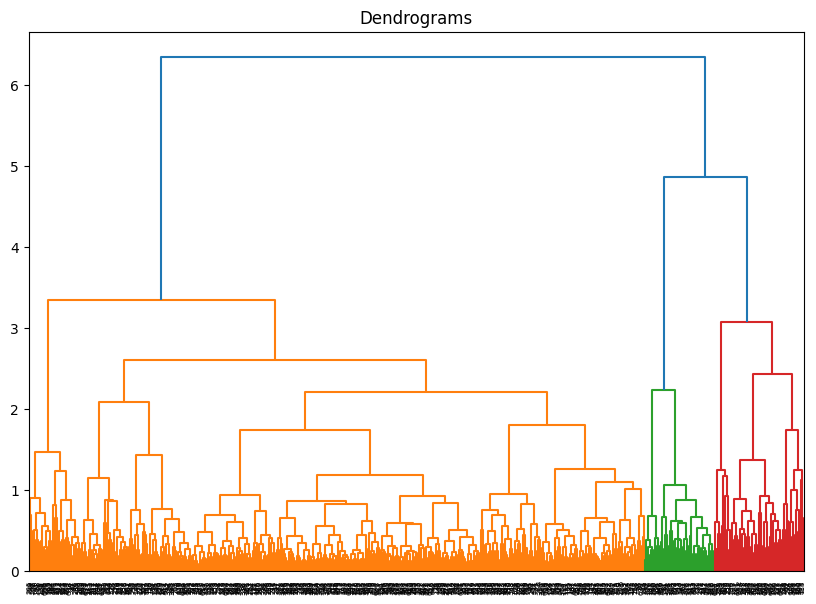

In [21]:
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))


**The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 4 and cut the dendrogram.**

**Where to cut the dendrograms?** The approach adopted for this work to cut dendrograms is just one way to cut the dendrograms. In general, clustering is an exploratory approach, it depends on what is the termination condition (domain knowledge), therefore, there is no best answer where to cut the cluster. However, there are several methods to find the definitive answer depending on the context and the problem in hand.

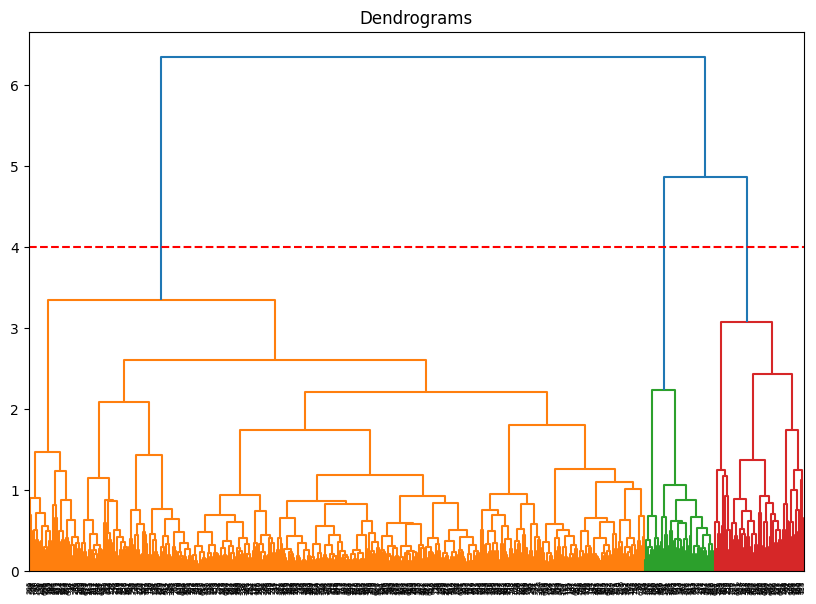

In [22]:
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline( y=4, color='r', linestyle='--')

**Q4.** Discuss what happens when you decide to cut the dendogram in different level.

The level where the dendrogram is cut defines the resulting clusters and their granularity. A higher cut will result in fewer clusters that will tend to be more generalized. On the other hand, a lower cut will increase the number of clusters that tend to be more specific and homogeneous.

In [23]:
# n_clusters = 3
# metric (newer version) is set to euclidean
# linkage is set to "ward", which minimizes the variant between the clusters

cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
cluster_ids = cluster.fit_predict(data_scaled)


In [24]:
clustering_data['cluster'] = cluster_ids
clustering_data.head()

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences,cluster
0,18,0,2,5,2,0,5,5,8,8,6,0,3,35,0
1,3,0,5,9,0,3,3,2,2,0,0,1,4,30,0
2,6,2,4,6,0,1,6,4,5,1,3,0,8,16,1
3,11,0,6,6,0,1,9,3,3,4,2,2,19,52,0
4,8,0,1,0,0,2,5,0,2,2,0,0,4,16,0


In [25]:
# Calculate the mean value of the clusters

hiarchical_cluster = pd.DataFrame(round(clustering_data.groupby('cluster').mean(),1))
hiarchical_cluster

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
cluster,,,,,,,,,,,,,,
0,5.1,0.4,2.9,4.4,1.5,0.8,3.3,1.1,3.7,1.4,0.9,0.5,4.5,25.5
1,2.8,0.6,3.9,2.5,0.9,0.3,7.5,0.5,2.3,1.2,2.7,0.3,7.9,10.0
2,8.5,1.0,5.7,5.4,2.2,1.1,8.2,2.3,8.8,4.7,28.3,2.9,6.8,35.0


**Q5.** Discuss the cluster results based on your dataset.

1. **Cluster 2** exhibits higher average occurrences in various crime types, including:
   - **Violence and sexual offences**
   - **Shoplifting**
   - **Vehicle crime**
   - **Antisocial behaviour**
   - And other related categories.

2. The second cluster, identified by the number **1**, also has elevated averages across different crime types.

3. Finally, **Cluster 0** has the lowest average occurrences in most of the crime types.

In summary, the clusters reveal distinct patterns in crime occurrences, with each cluster exhibiting varying levels of criminal activity. 

### Plot the dangerous areas

In [26]:
# 1.1 Merge the cluster ID to each LSOA code

clustering_data_original['cluster'] = cluster_ids
clusters = clustering_data_original[['LSOA code', 'cluster']]
clusters.head()

,LSOA code,cluster
0,E01008881,0
1,E01008882,0
2,E01008883,1
3,E01008884,0
4,E01008885,0


In [27]:
# Let's assign each crime to a cluster based on the LSOA code

clustered_full = pd.merge(filtered_data, clusters, on = 'LSOA code')
clustered_full.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,key,town,cluster
0,fdbfe8687cff5c8bb5b608d2c55c1c0f89ab4bffc0a930...,2023-07,West Midlands Police,West Midlands Police,-1.848972,52.588428,On or near Woodside,E01009417,Birmingham 001A,Burglary,Status update unavailable,NaN,file0,Birmingham,0
1,529bf0133cd02de6bb141ed626da524290228839e49dd4...,2023-07,West Midlands Police,West Midlands Police,-1.847123,52.593864,On or near Bramble Way,E01009417,Birmingham 001A,Other theft,Status update unavailable,NaN,file0,Birmingham,0
2,d0b1a135417bdcc795357bc98aaa6c671e0e4ae733645d...,2023-07,West Midlands Police,West Midlands Police,-1.847123,52.593864,On or near Bramble Way,E01009417,Birmingham 001A,Violence and sexual offences,Unable to prosecute suspect,NaN,file0,Birmingham,0
3,NaN,2023-08,West Midlands Police,West Midlands Police,-1.849790,52.590937,On or near Walsall Road,E01009417,Birmingham 001A,Anti-social behaviour,NaN,NaN,file1,Birmingham,0
4,301c06902682153b189d8993030f7c6d388c0618c88829...,2023-08,West Midlands Police,West Midlands Police,-1.849790,52.590937,On or near Walsall Road,E01009417,Birmingham 001A,Shoplifting,Investigation complete; no suspect identified,NaN,file1,Birmingham,0


In [28]:
def get_color(cluster_id):
    if cluster_id == 1:
        return 'yellow'
    if cluster_id == 0:
        return 'green'
    if cluster_id == 2:
        return 'darkred' 

In [29]:

# Create a map
this_map = folium.Map(location=[clustered_full["Latitude"].mean(), clustered_full["Longitude"].mean()], zoom_start=5)

def plot_dot(point):
    """
    Input: series that contains a numeric named latitude and a numeric named longitude
    This function creates a CircleMarker and adds it to your this_map
    """
    folium.CircleMarker(location=[point["Latitude"], point["Longitude"]],
                        radius=2,
                        color=point["color"],
                        fill=True,
                        fill_color=point["color"],
                        fill_opacity=0.6,
                        weight=1).add_to(this_map)

# Assign colors to clusters
clustered_full["color"] = clustered_full["cluster"].apply(lambda x: get_color(x))

# Use df.apply(,axis=1) to iterate through every row in your dataframe
clustered_full.apply(plot_dot, axis=1)

# Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())

# Save the map to an HTML file
this_map.save(os.path.join('Crime_map_1.html'))
